In [1]:
!ls /eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/electrons/run3_126X_2023/ndjson_126X_mcRun3_2023_forPU65_byevent_v1

processed  raw


In [29]:
from dataset_loader import ECALGraphDataset
from torch_geometric.loader import DataLoader
import networkx as nx
from torch_geometric.utils import to_networkx

In [58]:
! ls /eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/gammas/run3_126X_2023_overlapTraining_double/ndjson_126X_mcRun3_2023_forPU65_byevent_v1/processed/



graph_data_group_10_0.pt  graph_data_group_19_0.pt  graph_data_group_27_0.pt
graph_data_group_11_0.pt  graph_data_group_1_0.pt   graph_data_group_2_0.pt
graph_data_group_12_0.pt  graph_data_group_20_0.pt  graph_data_group_3_0.pt
graph_data_group_13_0.pt  graph_data_group_21_0.pt  graph_data_group_4_0.pt
graph_data_group_14_0.pt  graph_data_group_22_0.pt  graph_data_group_5_0.pt
graph_data_group_15_0.pt  graph_data_group_23_0.pt  graph_data_group_6_0.pt
graph_data_group_16_0.pt  graph_data_group_24_0.pt  graph_data_group_7_0.pt
graph_data_group_17_0.pt  graph_data_group_25_0.pt  graph_data_group_8_0.pt
graph_data_group_18_0.pt  graph_data_group_26_0.pt  graph_data_group_9_0.pt


In [59]:
d_singleele = ECALGraphDataset("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/electrons/run3_126X_2023/ndjson_126X_mcRun3_2023_forPU65_byevent_v1")
d_doubleele = ECALGraphDataset("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/gammas/run3_126X_2023_overlapTraining_double/ndjson_126X_mcRun3_2023_forPU65_byevent_v1")

In [8]:
a = next(iter(d_singleele))

In [60]:
dl_singleele =  DataLoader(
        d_singleele,
        batch_size=1,
        num_workers=2,
        pin_memory=True  # Faster data transfer to GPU
    )
dl_doubleele =  DataLoader(
        d_doubleele,
        batch_size=1,
        num_workers=2,
        pin_memory=True  # Faster data transfer to GPU
    )

In [62]:
a1 = next(iter(dl_singleele))
a2 = next(iter(dl_doubleele))

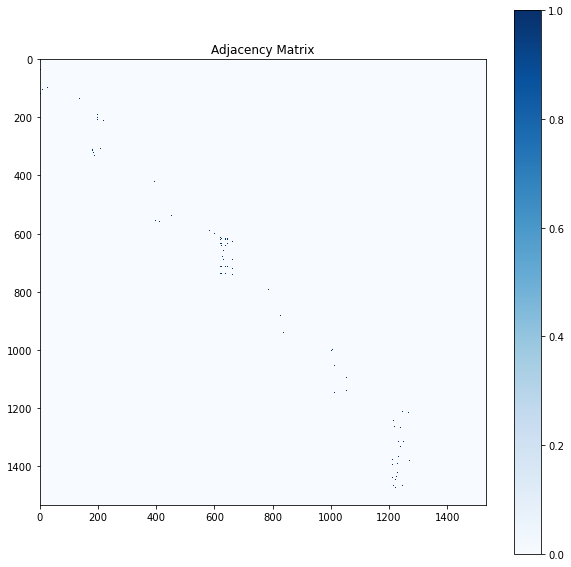

In [43]:
# Convert the edge_index to a NetworkX graph
G = to_networkx(a)

# Get the adjacency matrix
adj_matrix = nx.to_numpy_array(G)

# Plot the adjacency matrix
plt.figure(figsize=(10, 10))
plt.imshow(adj_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Adjacency Matrix")
plt.show()

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(data):
    G = nx.Graph()
    
    # Add nodes with positions and sizes
    for i, (ieta, iphi, en) in enumerate(zip(data.x[:, 4], data.x[:, 5], data.x[:, 0])):
        G.add_node(i, pos=(ieta.item(), iphi.item()), size=en.item())
    
    # Add edges
    for edge in data.edge_index.T:
        G.add_edge(edge[0].item(), edge[1].item())
    
    # Get positions and sizes for drawing
    pos = nx.get_node_attributes(G, 'pos')
    sizes = [G.nodes[node]['size'] for node in G.nodes]  # Scale sizes for better visualization
    
    # Draw the graph
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_size=sizes, node_color='skyblue', edge_color='gray', font_size=8) #node_size=sizes, 
    plt.show()


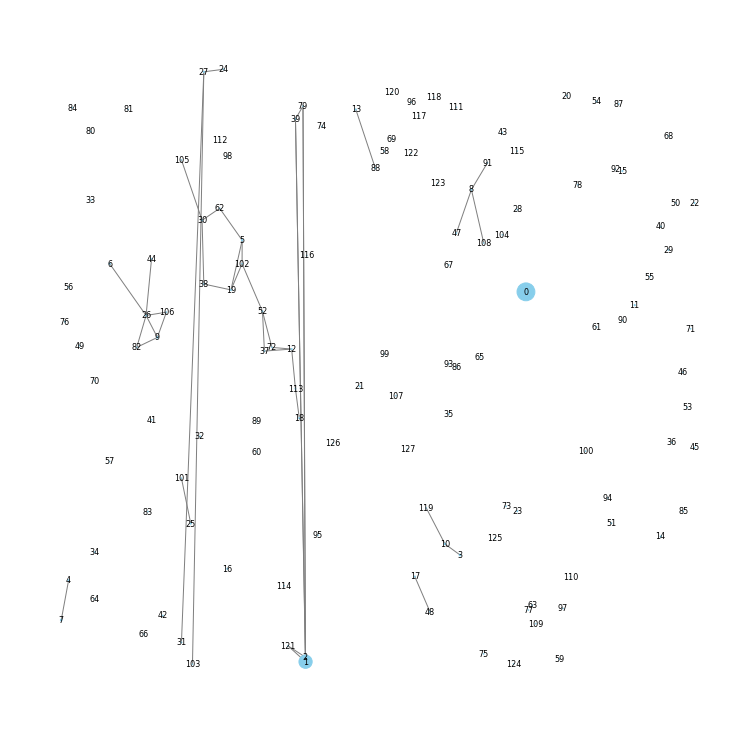

In [63]:
draw_graph(a1)

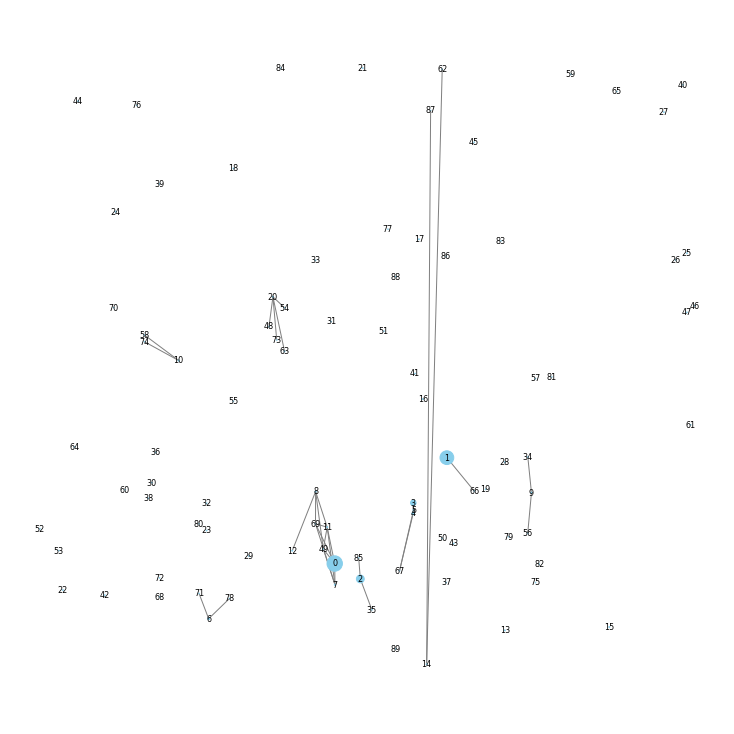

In [64]:
draw_graph(a2)

In [45]:
i = 0
for data in dl:
    print(data)
    if i > 100:
        break
    i+=1

DataBatch(edge_index=[2, 891], y=[1534, 8], edge_attr=[891, 3], x=[1534, 21], batch=[1534], ptr=[21])
DataBatch(edge_index=[2, 624], y=[1157, 8], edge_attr=[624, 3], x=[1157, 21], batch=[1157], ptr=[21])
DataBatch(edge_index=[2, 1063], y=[1720, 8], edge_attr=[1063, 3], x=[1720, 21], batch=[1720], ptr=[21])
DataBatch(edge_index=[2, 931], y=[1487, 8], edge_attr=[931, 3], x=[1487, 21], batch=[1487], ptr=[21])
DataBatch(edge_index=[2, 664], y=[1137, 8], edge_attr=[664, 3], x=[1137, 21], batch=[1137], ptr=[21])
DataBatch(edge_index=[2, 646], y=[1286, 8], edge_attr=[646, 3], x=[1286, 21], batch=[1286], ptr=[21])
DataBatch(edge_index=[2, 704], y=[1373, 8], edge_attr=[704, 3], x=[1373, 21], batch=[1373], ptr=[21])
DataBatch(edge_index=[2, 719], y=[1420, 8], edge_attr=[719, 3], x=[1420, 21], batch=[1420], ptr=[21])
DataBatch(edge_index=[2, 1018], y=[1552, 8], edge_attr=[1018, 3], x=[1552, 21], batch=[1552], ptr=[21])
DataBatch(edge_index=[2, 872], y=[1568, 8], edge_attr=[872, 3], x=[1568, 21], 